# VirES - access to Swarm, CHAMP, and Cryosat-2 virtual observatories data

This notebook demonstrates access to Swarm, CHAMP and Cryosat-2 VOBS_1M and V_OBS_4M virtual observatory data via the VirES for Swarm API.

Avalable observed and core field data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | Swarm 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | Swarm 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | Swarm 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | Swarm 4 months data from one selected virtual observatory |
| `CH_OPER_VOBS_1M_2_` | CHAMP 1 month data from all virtual observatories |
| `CH_OPER_VOBS_1M_2_:<code>` | CHAMP 1 month data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_` | CHAMP 4 month data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:<code>` | CHAMP 4 months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_` | Cryosat-2 4 month data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:<code>` | Cryosat-2 4 months data from one selected virtual observatory |

Avalable field secular variation data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_:SecularVariation` | Swarm 1 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:SecularVariation:<code>` | Swarm 1 month secular variation data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_:SecularVariation` | Swarm 4 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:SecularVariation:<code>` | Swarm 4 months secular variation data from one selected virtual observatory |
| `CH_OPER_VOBS_1M_2_:SecularVariation` | CHAMP 1 month secular variation data from all virtual observatories |
| `CH_OPER_VOBS_1M_2_:SecularVariation:<code>` | CHAMP 1 month secular variation data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_:SecularVariation` | CHAMP 4 month secular variation data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:SecularVariation:<code>` | CHAMP 4 secular variation months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_:SecularVariation` | Cryosat-2 4 month secular variation data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:SecularVariation:<code>` | Cryosat-2 4 months secular variation data from one selected virtual observatory |

The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable observed and core filed variables (same for all collections)

| Variable | Unit | Dimension | Description |
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

Avalable secular variation variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_SV` | $\text{nT}/\text{yr}$ | vector [3] | Field secular variation vector in ITRF NEC frame. |
| `sigma_SV` | $\text{nT}/\text{yr}$ | vector [3] | Estimated error of the field secular variation vector in ITRF NEC frame. |


In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@swarm_gvo#egg=viresclient'


  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision swarm_gvo) to /tmp/pip-install-ljag6x3t/viresclient
  Created wheel for viresclient: filename=viresclient-0.8.0a0-py3-none-any.whl size=70959 sha256=302bd6f3eb8f79653aa6e340b71765cf6de1c0d0dfe944b1ce3c2a01c140c3c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-c6x1taoj/wheels/d3/d4/f3/ed4b44570cfc4c1529d54fcdf6c4fba7573c4becadc76e9c64
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.8.0a0
    Uninstalling viresclient-0.8.0a0:
      Successfully uninstalled viresclient-0.8.0a0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

#server_url = None # default VirES server
server_url = 'https://staging.viresdisc.vires.services/ows' # DISC server

request = SwarmRequest(server_url)

VOBS_VARIABLES = ['SiteCode', 'B_CF', 'B_OB', 'sigma_CF', 'sigma_OB']
VOBS_SV_VARIABLES = ['SiteCode', 'B_SV', 'sigma_SV']


## Swarm, CHAMP, and Cryosat-2 - VOBS_1M and VOBS_4M - one virtual observatory

In [3]:
from datetime import datetime

site = 'S77W114'

collections = {
    'SW_1M': 'SW_OPER_VOBS_1M_2_',
    'SW_4M': 'SW_OPER_VOBS_4M_2_',
    'CH_1M': 'CH_OPER_VOBS_1M_2_',
    'CH_4M': 'CH_OPER_VOBS_4M_2_',
    'CR_4M': 'CR_OPER_VOBS_4M_2_',
}
data = {}
data_sv = {}

for source, collection in collections.items():

    request.set_collection(f'{collection}:{site}')
    request.set_products(measurements=VOBS_VARIABLES)
    data[source] = request.get_between(
        start_time='2000-01-01T10:00:00Z',
        end_time=datetime.now(),
        asynchronous=False,
    ).as_xarray()
    print(data[source])
    
    request.set_collection(f'{collection}:SecularVariation:{site}')
    request.set_products(measurements=VOBS_SV_VARIABLES)
    data_sv[source] = request.get_between(
        start_time='2000-01-01T10:00:00Z',
        end_time=datetime.now(),
        asynchronous=False,
    ).as_xarray()
    print(data[source])


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 82)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.02e+04
    sigma_OB    (Timestamp, NEC) float64 -17.46 21.85 -7.305 ... 18.69 -9.703
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... -2.358 5.248 -7.765
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.021e+04
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20200915T000000_0103']

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 82)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.02e+04
    sigma_OB    (Timestamp, NEC) float64 -17.46 21.85 -7.305 ... 18.69 -9.703
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... -2.358 5.248 -7.765
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.021e+04
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20200915T000000_0103']

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.017e+04
    sigma_OB    (Timestamp, NEC) float64 -13.37 14.66 -5.103 ... 20.13 -7.642
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 -3.435 7.412 -9.204 ... 7.412 -9.204
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0103']
    

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.017e+04
    sigma_OB    (Timestamp, NEC) float64 -13.37 14.66 -5.103 ... 20.13 -7.642
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 -3.435 7.412 -9.204 ... 7.412 -9.204
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0103']
    

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 122)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-08-15T12:00:00 ... 2010-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 nan nan nan nan nan ... nan nan nan nan
    sigma_OB    (Timestamp, NEC) float64 -27.69 41.74 -18.98 ... 14.38 -7.572
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan nan ... nan nan nan nan
    B_OB        (Timestamp, NEC) float64 7.19e+03 1.207e+04 ... -4.322e+04
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.741e+06 6.741e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['CH_OPER_VOBS_1M_2_20000815T000000_20100915T000000_010

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 30)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-11-01T12:00:00 ... 2010-07-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.202e+04 -4.321e+04
    sigma_OB    (Timestamp, NEC) float64 nan nan nan nan ... -6.64 8.28 -4.859
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... -4.305 6.863 -9.111
    B_OB        (Timestamp, NEC) float64 nan nan nan ... 1.203e+04 -4.324e+04
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.741e+06 6.741e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['CH_OPER_VOBS_4M_2_20001101T000000_20100701T000000_010

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 26)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2010-07-01T12:00:00 ... 2018-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 9.73e+03 -3.633e+04
    sigma_OB    (Timestamp, NEC) float64 -9.533 9.518 -5.27 ... 27.64 -9.464
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_CF    (Timestamp, NEC) float64 nan nan nan ... -5.667 11.27 -7.256
    B_OB        (Timestamp, NEC) float64 6.355e+03 9.76e+03 ... -3.636e+04
    Radius      (Timestamp) float64 7.098e+06 7.098e+06 ... 7.098e+06 7.098e+06
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
Attributes:
    Sources:         ['CR_OPER_VOBS_4M_2_20100701T000000_20181101T000000_0102']
    Ma

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


''

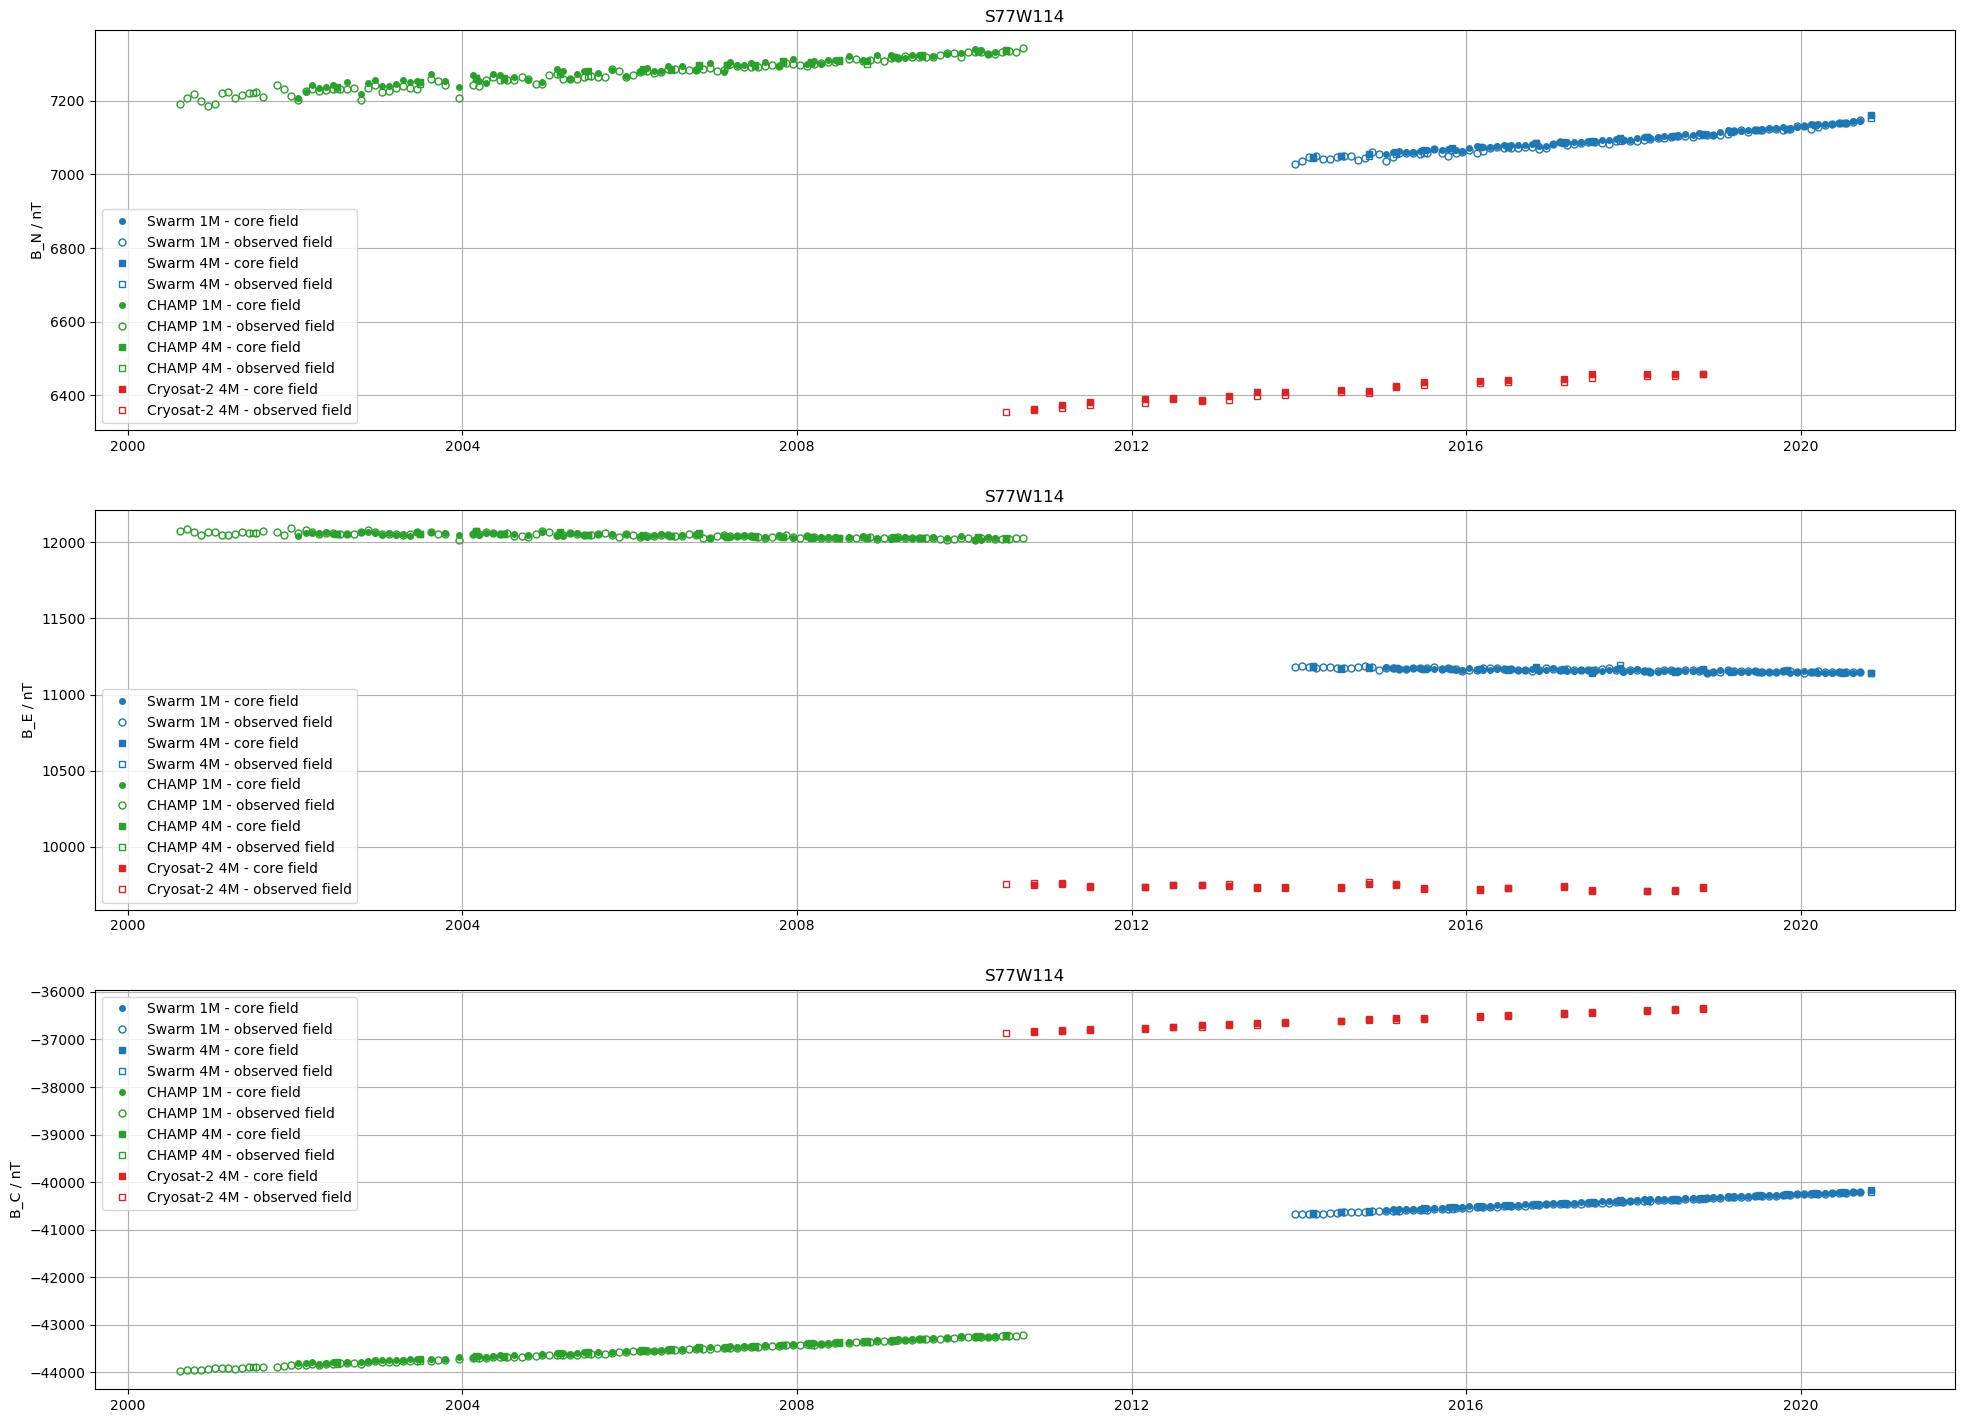

In [4]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(plots, labels)
;

''

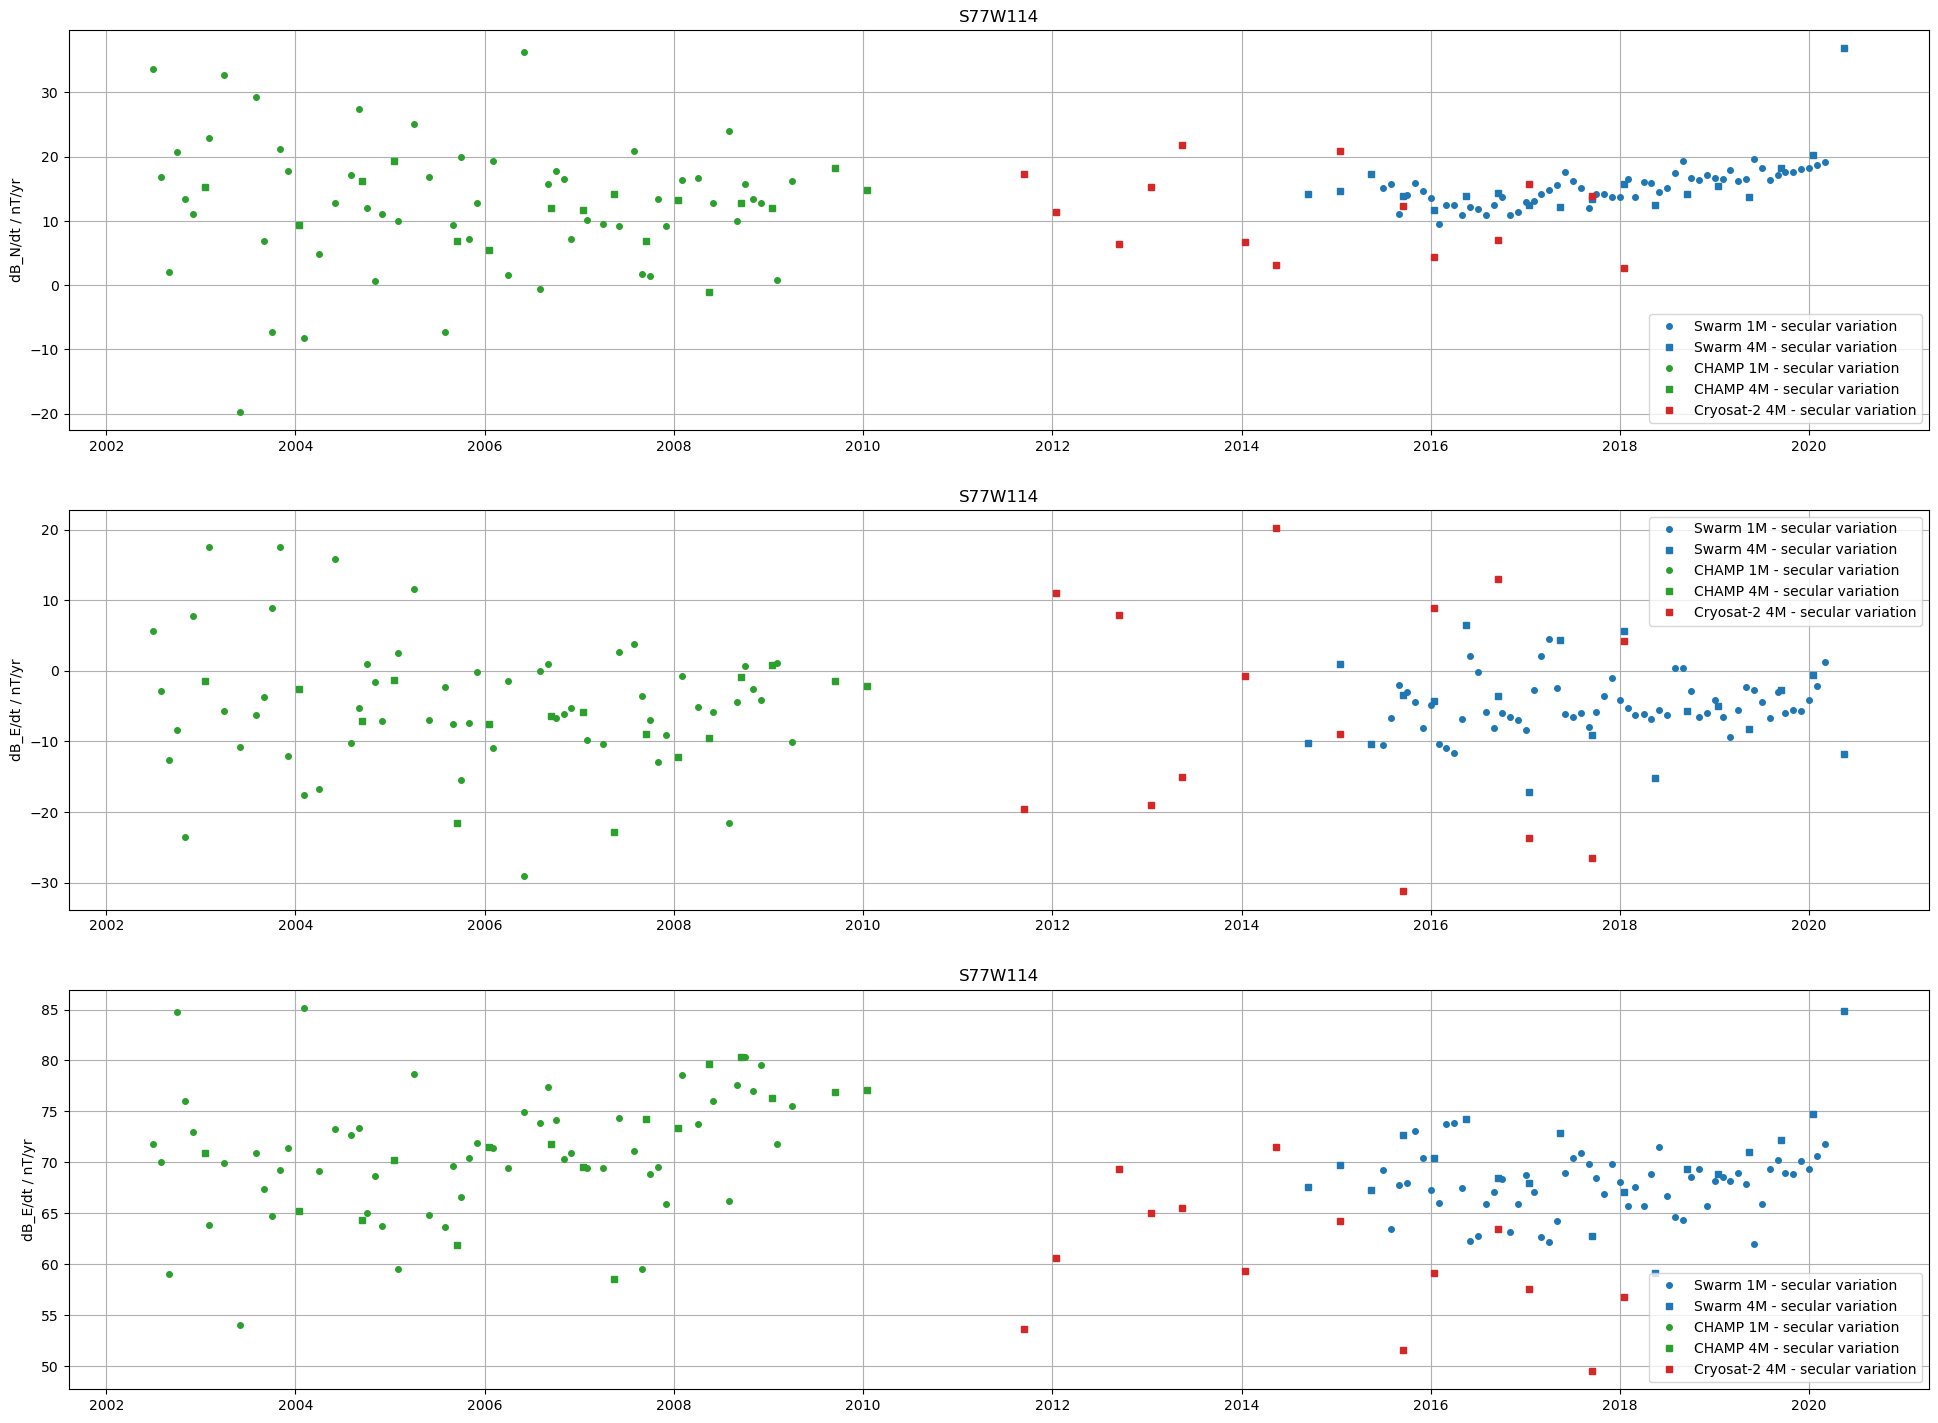

In [5]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation')
ax.set_title(site)
ax.set_ylabel('dB_N/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation')
ax.set_title(site)
ax.set_ylabel('dB_E/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation')
ax.set_title(site)
ax.set_ylabel('dB_E/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)
;